# Clustering - Kmeans

Realizado por [Kevin Arvai](https://realpython.com/team/karvai/) y [Juan Ignacio Bagnato](https://www.aprendemachinelearning.com/sobre-mi/)

adaptado por  Mónica Tatiana Gutierrez Ballen

version 1.0, Agosto 2021

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

##¿Qué es el clustering?

El clustering es un conjunto de técnicas utilizadas para dividir los datos en grupos, o clusters. Los clústeres se definen de forma imprecisa como grupos de objetos de datos que son más similares a otros objetos de su clúster que a los de otros clústeres. En la práctica, la agrupación ayuda a identificar dos cualidades de los datos:

- Significado: Los clusters significativos amplían el conocimiento del dominio. Por ejemplo, en el campo de la medicina, los investigadores aplicaron el clustering a los experimentos de expresión genética. Los resultados de la agrupación identificaron grupos de pacientes que responden de forma diferente a los tratamientos médicos.

- Utilidad: Los clústeres útiles sirven como paso intermedio en una cadena de datos. Por ejemplo, las empresas utilizan el clustering para la segmentación de clientes. Los resultados del clustering segmentan a los clientes en grupos con historiales de compra similares, que las empresas pueden utilizar para crear campañas publicitarias dirigidas.


## Visión general de las técnicas de clustering

Se puede realizar el clustering utilizando muchos enfoques diferentes, tantos, de hecho, que hay categorías enteras de algoritmos de clustering. Cada una de estas categorías tiene sus propios puntos fuertes y débiles. Esto significa que ciertos algoritmos de clustering resultarán en asignaciones de cluster más naturales dependiendo de los datos de entrada.

La selección de un algoritmo de clustering apropiado para su conjunto de datos es a menudo difícil debido al número de opciones disponibles. Algunos factores importantes que afectan a esta decisión son las características de los clusters, las características del conjunto de datos, el número de valores atípicos y el número de objetos de datos.

Exploraremos cómo estos factores ayudan a determinar qué enfoque es el más apropiado, examinando tres categorías populares de algoritmos de clustering:

### Clustering parcial: 

La agrupación parcial divide los objetos de datos en grupos que no se solapan. En otras palabras, ningún objeto puede ser miembro de más de un cluster, y cada cluster debe tener al menos un objeto.

Estas técnicas requieren que el usuario especifique el número de clusters, indicado por la variable k. Muchos algoritmos de clustering particional funcionan mediante un proceso iterativo para asignar subconjuntos de puntos de datos en k clusters. Dos ejemplos de algoritmos de clustering particional son *k-means* y k-medoids.

Ambos algoritmos son no deterministas, lo que significa que pueden producir resultados diferentes en dos ejecuciones distintas, incluso si las ejecuciones se basan en la misma entrada.

Los métodos de clustering particional tienen varios puntos fuertes:

- Funcionan bien cuando los clusters tienen una forma esférica.
- Son escalables con respecto a la complejidad del algoritmo.

También tienen varios puntos débiles:

- No son adecuados para clusters con formas complejas y diferentes tamaños.
- Se estropean cuando se utilizan con clusters de diferentes densidades.

### Clustering jerárquico

Clustering jerárquico

El clustering jerárquico determina la asignación de clusters mediante la construcción de una jerarquía. Esto se lleva a cabo mediante un enfoque ascendente o descendente:

- El clustering aglomerativo es el enfoque ascendente. Combina los dos puntos que son más similares hasta que todos los puntos se han fusionado en un solo clúster.

- El clustering divisivo es el enfoque descendente. Comienza con todos los puntos como un clúster y divide los clústeres menos similares en cada paso hasta que sólo quedan puntos de datos individuales.

Estos métodos producen una jerarquía de puntos basada en un árbol llamada dendrograma. Al igual que en el clustering particional, en el clustering jerárquico el número de clusters (k) suele estar predeterminado por el usuario. Los clusters se asignan cortando el dendrograma a una profundidad determinada que da lugar a k grupos de dendrogramas más pequeños.

A diferencia de muchas técnicas de clustering particional, el clustering jerárquico es un proceso determinista, lo que significa que las asignaciones de cluster no cambiarán cuando se ejecute un algoritmo dos veces con los mismos datos de entrada.

Los puntos fuertes de los métodos de clustering jerárquico son los siguientes

- A menudo revelan los detalles más finos sobre las relaciones entre los objetos de datos.
- Proporcionan un dendrograma interpretable.

Los puntos débiles de los métodos de clustering jerárquico son los siguientes

- Son costosos desde el punto de vista computacional con respecto a la complejidad del algoritmo.
- Son sensibles al ruido y a los valores atípicos.

### Clustering basado en la densidad

La agrupación basada en la densidad determina la asignación de clusters en función de la densidad de puntos de datos en una región. Los clusters se asignan donde hay altas densidades de puntos de datos separados por regiones de baja densidad.

A diferencia de las otras categorías de clustering, este enfoque no requiere que el usuario especifique el número de clusters. En su lugar, hay un parámetro basado en la distancia que actúa como un umbral ajustable. Este umbral determina la proximidad de los puntos para ser considerados miembros de un cluster.

Algunos ejemplos de algoritmos de clustering basados en la densidad son Density-Based Spatial Clustering of Applications with Noise, o DBSCAN, y Ordering Points To Identify the Clustering Structure, o OPTICS.

Los puntos fuertes de los métodos de clustering basados en la densidad son los siguientes

- Sobresalen en la identificación de clusters de formas no esféricas.
- Son resistentes a los valores atípicos.

Los puntos débiles de los métodos de clustering basados en la densidad son los siguientes:

- No son adecuados para la agrupación en espacios de alta dimensión.
- Tienen problemas para identificar conglomerados de densidades variables.





## K-means

K-Means es un algoritmo no supervisado de Clustering. Se utiliza cuando tenemos un montón de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos crudos.

El k-means convencional sólo requiere unos pocos pasos. El primer paso es seleccionar aleatoriamente k centroides, donde k es igual al número de clusters que se elija. Los centroides son puntos de datos que representan el centro de un clúster.

### Cómo funciona K-Means (Algoritmo de Lloyd)

El algoritmo trabaja iterativamente para asignar a cada “punto” (las filas de nuestro conjunto de entrada forman una coordenada) uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus variables. Como resultado de ejecutar el algoritmo tendremos:

* Los “centroids” de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos que se utilizarán para poder etiquetar nuevas muestras. 
* Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera “orgánica”, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroids deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

### Pasos para ejecutar K-means



In [1]:
from IPython.display import Image
Image(url= "https://files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png", width=900)

La calidad de las asignaciones de los clusters se determina calculando la *suma del error cuadrático (SSE)* después de que los centroides converjan o coincidan con la asignación de la iteración anterior. La SSE se define como la suma de las **distancias euclidianas** al cuadrado de cada punto a su centroide más cercano. Como se trata de una medida de error, el objetivo de k-means es intentar minimizar este valor.

La figura siguiente muestra la actualización de los centroides y del SSE durante las cinco primeras iteraciones de dos ejecuciones diferentes del algoritmo k-means en el mismo conjunto de datos:

In [2]:
from IPython.display import Image
Image(url= "https://files.realpython.com/media/centroids_iterations.247379590275.gif", width=900)

El propósito de esta figura es mostrar que la inicialización de los centroides es un paso importante. También pone de manifiesto el uso de la SSE como medida del rendimiento de la agrupación. Después de elegir un número de clusters y los centroides iniciales, el paso de maximización de expectativas se repite hasta que las posiciones de los centroides alcanzan la convergencia y no se modifican.

El paso de inicialización aleatoria hace que el algoritmo k-means sea no determinista, lo que significa que las asignaciones de los clusters variarán si se ejecuta el mismo algoritmo dos veces en el mismo conjunto de datos. Los investigadores suelen ejecutar varias inicializaciones del algoritmo k-means completo y eligen las asignaciones de clústeres de la inicialización con el SSE más bajo. 

## Casos de Uso de K-Means

El algoritmo de Clustering K-means es uno de los más usados para encontrar grupos ocultos, o sospechados en teoría sobre un conjunto de datos no etiquetado. Esto puede servir para confirmar -o desterrar- alguna teoría que teníamos asumida de nuestros datos. Y también puede ayudarnos a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no hubiéramos reconocido. Una vez que el algoritmo ha ejecutado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.

Algunos casos de uso son:

* Segmentación por Comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
* Categorización de Inventario: agrupar productos por actividad en sus ventas.
* Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal.


## Consideraciones importantes para hacer un K-means

- Las “features” o características que utilizaremos como entradas para aplicar el algoritmo k-means deberán ser de valores numéricos, continuos en lo posible.  
 - En caso de valores categóricos (por ej. Hombre/Mujer o Ciencia Ficción, Terror, Fantasía,etc) se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una “distancia real” -como en el caso de géneros de película o libros-. Leer: [K-modes y K KPrototypes](https://towardsdatascience.com/clustering-algorithm-for-data-with-mixed-categorical-and-numerical-features-d4e3a48066a0)  
- Es recomendable que los valores utilizados estén normalizados, manteniendo una misma escala. En algunos casos también funcionan mejor datos porcentuales en vez de absolutos. 
- No conviene utilizar features que estén correlacionados o que sean escalares de otros.

## K-means vs K-medoids

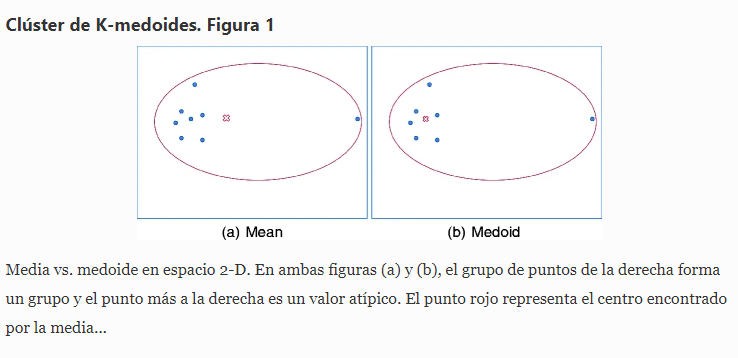

## Antes de... Elegir el valor de K

Este algoritmo funciona pre-seleccionando un valor de K. Para encontrar el número de clusters en los datos, deberemos ejecutar el algoritmo para un rango de valores K, ver los resultados y comparar características de los grupos obtenidos. En general no hay un modo exacto de determinar el valor K, pero se puede estimar con aceptable precisión siguiendo la siguiente técnica:

Una de las métricas usada para comparar resultados es la distancia media entre los puntos de datos y su centroid. Como el valor de la media diminuirá a medida de aumentemos el valor de K, deberemos utilizar la distancia media al centroide en función de K y entontrar el “punto codo”, donde la tasa de descenso se “afila”. Aquí vemos una gráfica a modo de ejemplo:

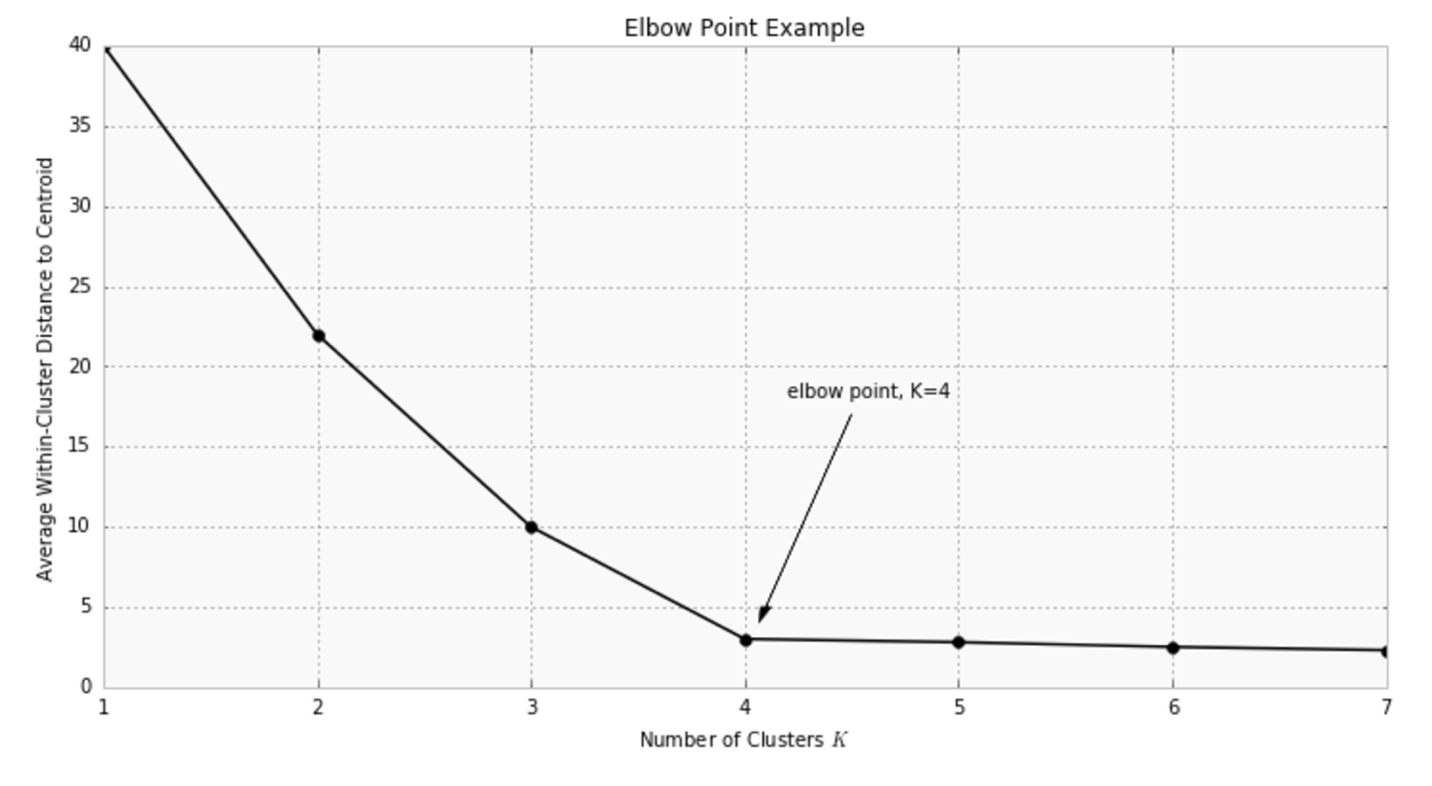

## Manos a la obra

Como [ejemplo](https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/) utilizaremos de entradas un conjunto de datos en el que se analizaban rasgos de la personalidad de usuarios de Twitter. Se filtraron a 140 “famosos” del mundo en diferentes areas: deporte, cantantes, actores, etc. Basado en una metodología de psicología conocida como “Ocean: The Big Five” tendemos como características de entrada:

- usuario (el nombre en Twitter)
- “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
- “co” =Conscientiousness – grado de orden, prolijidad, organización
- “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
- “ag” = Agreeableness – grado de empatía con los demás, temperamento
- “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
- Wordcount – Cantidad promedio de palabras usadas en sus tweets
- Categoría – Actividad laboral del usuario (actor, cantante, etc.)

Utilizaremos el algoritmo K-means para que agrupe estos usuarios -no por su actividad laboral- si no, por sus similitudes en la personalidad. Si bien tenemos 8 columnas de entrada, sólo utilizaremos 3 en este ejemplo, de modo que podamos ver en un gráfico tridimensional -y sus proyecciones a 2D- los grupos resultantes. Pero para casos reales, podemos utilizar todas las dimensiones que necesitemos. Una de las hipótesis que podríamos tener es: “Todos los cantantes tendrán personalidad parecida” (y así con cada rubro laboral). Pues veremos si lo probamos, o por el contrario, los grupos no están relacionados necesariamente con la actividad de estas Celebridades.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [4]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/prof-tatiana-gutierrez/DatosMD/master/analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [5]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1. Actor/actriz
1. Cantante
1. Modelo
1.Tv, series
1. Radio
1. Tecnología
1. Deportes
1. Politica
1. Escritor


In [6]:
dataframe.categoria.value_counts()

2    34
1    27
4    19
7    17
8    16
3     9
6     8
9     6
5     4
Name: categoria, dtype: int64

### Visualización de datos

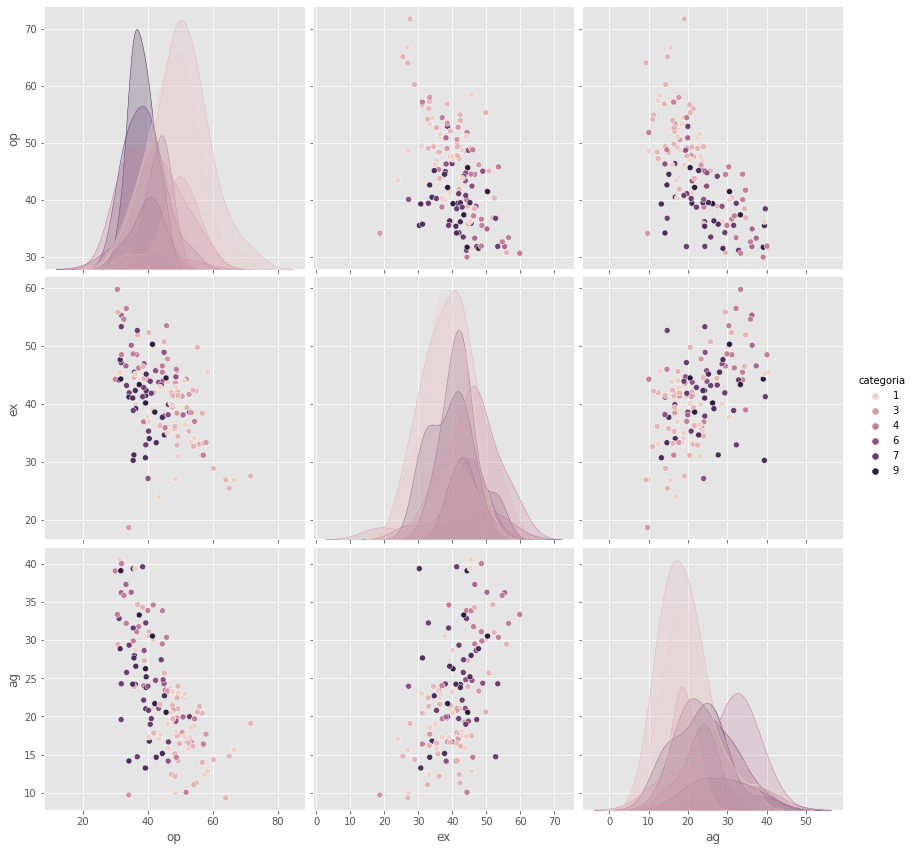

In [7]:
sb.pairplot(dataframe.dropna(), 
            hue='categoria', 
            height=4, 
            vars=["op","ex","ag"],
            kind='scatter')

In [8]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

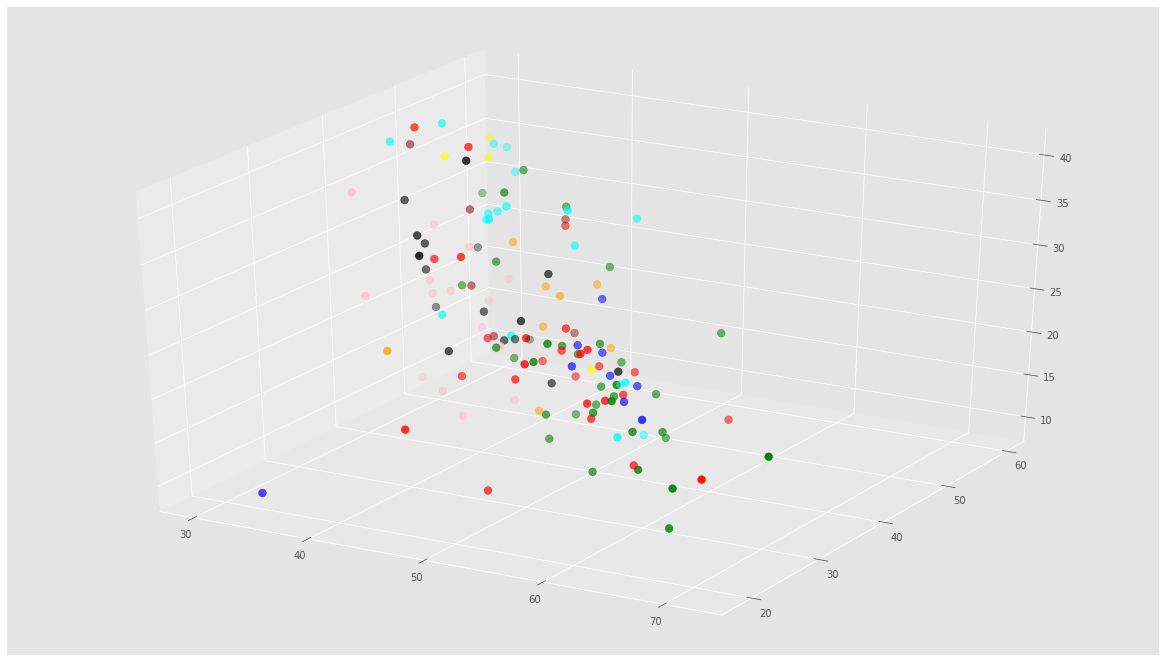

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

### Definir el valor de k

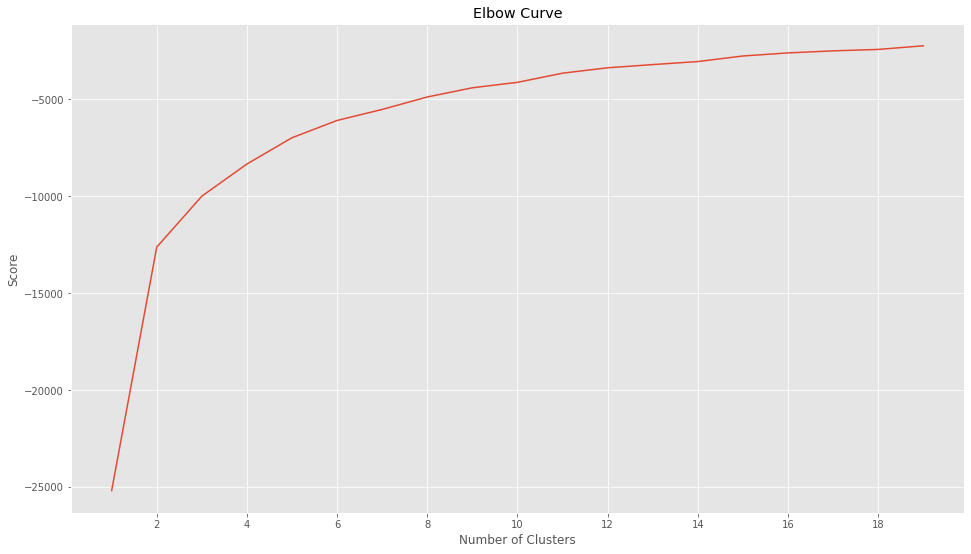

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Ejecutar K-means

In [11]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[42.75925435 32.7509888  21.08881555]
 [35.90241306 47.56828232 33.58748762]
 [58.70462307 30.53566167 15.72207033]
 [50.42588653 40.66723528 17.30892463]
 [40.14744474 43.54690971 23.11790265]]


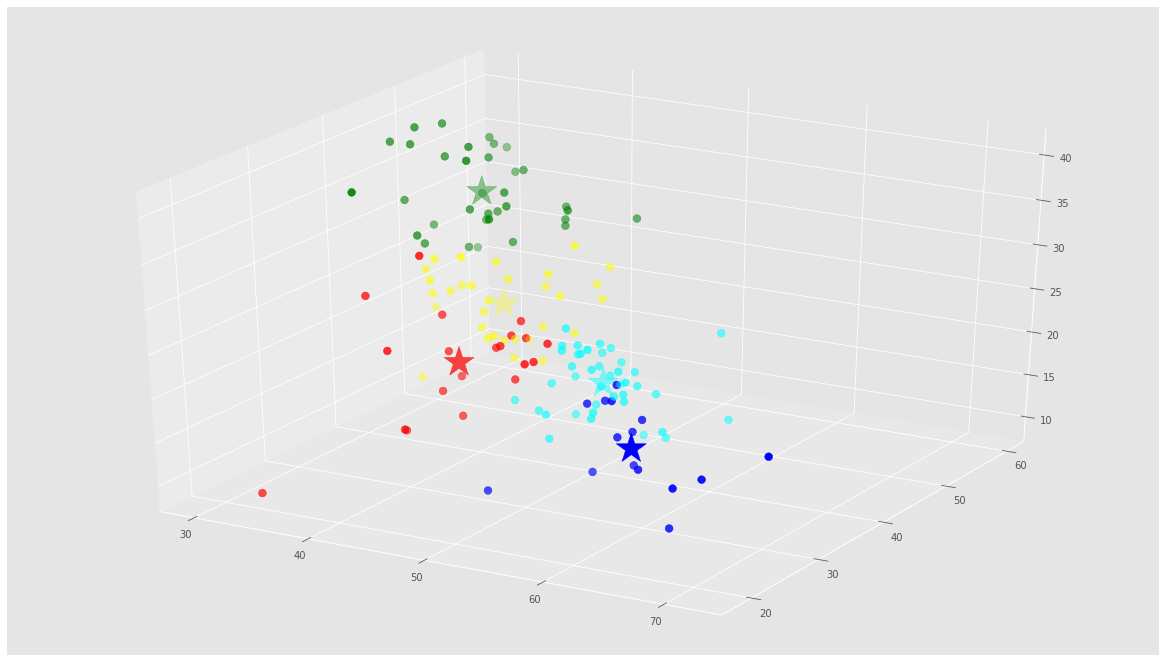

In [12]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [13]:
import plotly.express as px
import plotly.graph_objs as go


fig = px.scatter_3d(dataframe, x=X[:, 0], y=X[:, 1], z=X[:, 2],
              color=asignar)
fig.show()

Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. El objetivo es ver si hay una relación en los grupos con sus actividades de Celebrity.

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

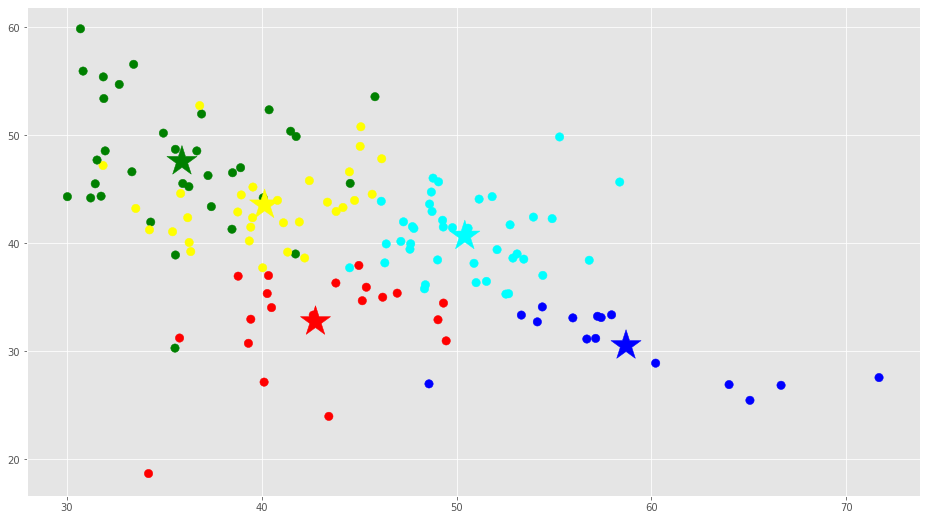

In [14]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

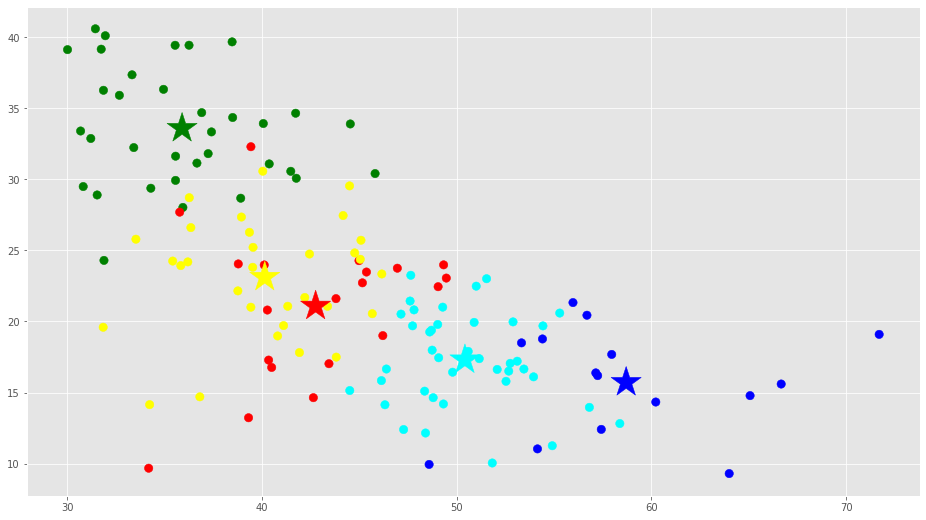

In [15]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

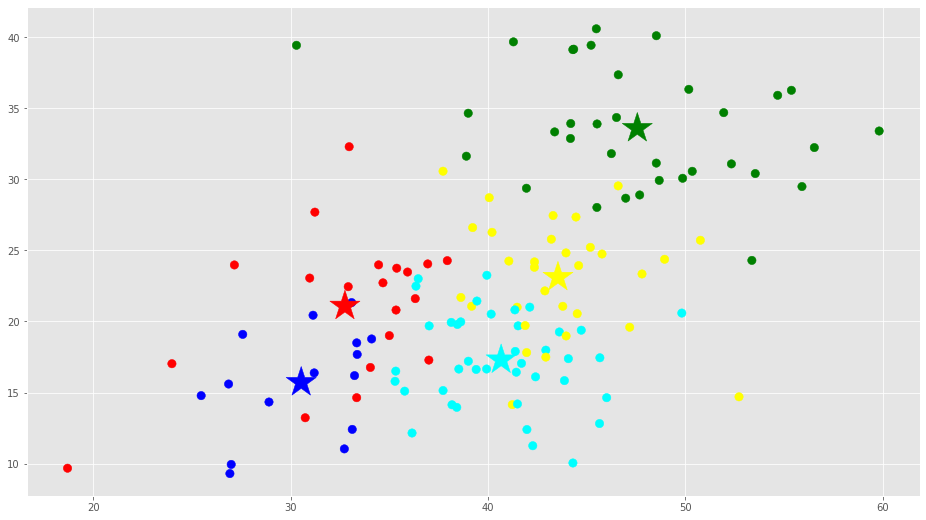

In [16]:

f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

### Analizar resultados

En estas gráficas vemos que están bastante bien diferenciados los grupos.

Podemos ver cada uno de los clusters cuantos usuarios tiene:

In [17]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,20
1,green,34
2,blue,15
3,cyan,40
4,yellow,31


Y podemos ver la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 0 (rojo), vemos que hay algunas de las actividades laborales aunque predominan de actividad 1 y 8 correspondiente a Actores y Políticos.

In [18]:
8### Grupo 0 (rojo): 
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,5.0
2,2,3.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,1.0
7,7,3.0
8,8,5.0
9,9,NaN


Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

In [19]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([120,  98,  82,  21,  64])

In [20]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

SarahPalinUSA
maria_patino
JudgeJudy
carmenelectra
ierrejon


### Evaluar el modelo de cluster: Silueta

El coeficiente de silueta es una medida de cohesión y separación de clusters. Cuantifica lo bien que encaja un punto de datos en el clúster asignado en función de dos factores:

- la proximidad del punto de datos a otros puntos del clúster
- La distancia entre el punto de datos y los puntos de otros clusters.

Los valores del coeficiente de silueta oscilan entre -1 y 1. Los números más grandes indican que las muestras están más cerca de sus clusters que de otros clusters.

El mejor valor es 1 y el peor es -1. Los valores cercanos a 0 indican que los clusters se solapan. Los valores negativos suelen indicar que una muestra ha sido asignada al clúster equivocado, ya que otro clúster es más similar.
La función silhouette score() necesita un mínimo de dos clusters, o lanzará una excepción. 

In [21]:
from sklearn.metrics import silhouette_score
print("Silhouette score n=5:",silhouette_score(X, kmeans.labels_).round(2))


Silhouette score n=5: 0.29


In [22]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
# Predicting the clusters
labels = kmeans.predict(X)
print("Silhouette score n=3:",silhouette_score(X, kmeans.labels_).round(2))

Silhouette score n=3: 0.31


In [23]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
# Predicting the clusters
labels = kmeans.predict(X)
print("Silhouette score n=2:",silhouette_score(X, kmeans.labels_).round(2))

Silhouette score n=2: 0.42


### Clasificar nuevos datos

In [24]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


## Conclusiones

El algoritmo de K-means nos ayudará a crear clusters cuando tengamos grandes grupos de datos sin etiquetar, cuando queramos intentar descubrir nuevas relaciones entre features o para probar o declinar hipótesis que tengamos de nuestro negocio.

Atención: Puede haber casos en los que no existan grupos naturales, o clusters que contengan una verdadera razón de ser. Si bien K-means siempre nos brindará “k clusters”, quedará en nuestro criterio reconocer la utilidad de los mismos o bien revisar nuestras features y descartar las que no sirven o conseguir nuevas. También tener en cuenta que en este ejemplo estamos utilizando como medida de similitud entre features la distancia Euclideana pero podemos utilizar otras diversas funciones que podrían arrojar mejores resultados (como Manhattan, Lavenshtein, Mahalanobis, etc).